In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [4]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)
# y = 0.8x^2 + 0.9x + 2

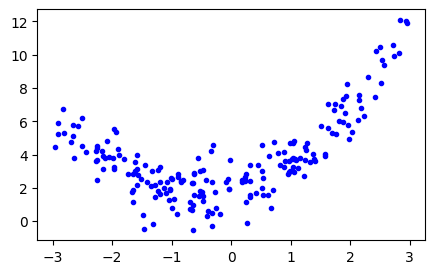

In [10]:
fig, ax1 = plt.subplots(ncols=1, figsize=(5, 3))
plt.plot(X, y, "b.")
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.13991465015673876

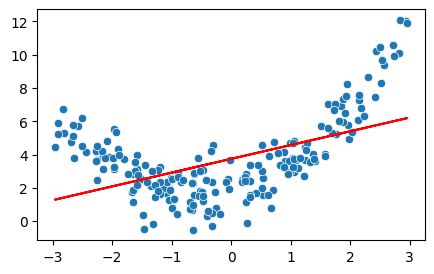

In [15]:
fig, ax1 = plt.subplots(ncols=1, figsize=(5, 3))
sns.scatterplot(x=X.flatten(), y=y.flatten(), ax=ax1)
plt.plot(X_train, lr.predict(X_train), color='red')
plt.show()

### Applying polynomial regression

In [16]:
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [17]:
print(X_train[0])
print(X_train_trans[0])
X_train.shape, X_train_trans.shape

[-0.98669288]
[ 1.         -0.98669288  0.97356285]


((160, 1), (160, 3))

#### Look each column is made into 3 columns - 1 will the original and the other 2 (degree 2) will be newly created

In [18]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
y_pred2 = lr.predict(X_test_trans)

In [20]:
r2_score(y_test, y_pred2)

0.8532648775663614

In [ ]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

X_new.shape, y_new.shape

((200, 1), (200, 1))

<Axes: >

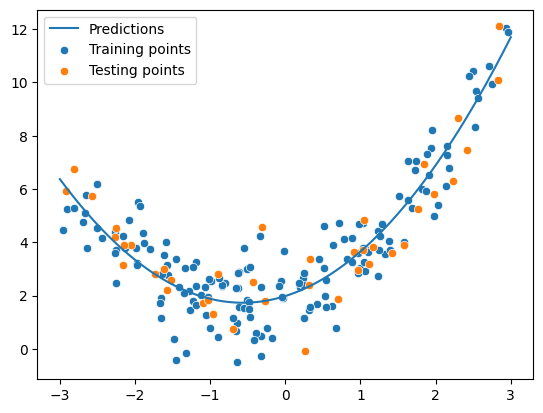

In [33]:
sns.lineplot(x=X_new.flatten(), y=y_new.flatten(), label="Predictions")
sns.scatterplot(x=X_train.flatten(), y=y_train.flatten(), label="Training points")
sns.scatterplot(x=X_test.flatten(), y=y_test.flatten(), label="Testing points")